# House Prices – Data Preparation

This notebook covers the initial data preparation process for the project.
The objective is to load the raw data, create a test set, explore the data,
and perform feature engineering in preparation for modeling.

**Main steps:**
1. Load the dataset
2. Create a train-test split
3. Exploratory data analysis and visualization
4. Feature engineering


 ## 1. Load the dataset

We begin by loading the raw dataset and performing a basic inspection
to understand its structure and contents.


In [11]:
import pandas as pd
housing = pd.read_csv("data.csv")
housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## 2. Create a train-test split

In [27]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(
    housing,
    test_size = 0.2,
    random_state = 88
)


### Stratified Sampling Based on Living Area

Since living area is a key factor influencing housing prices, we perform a stratified train–test split based on discretized living area categories. This ensures that both the training and test sets maintain a similar distribution of house sizes, reducing sampling bias and improving the reliability of model evaluation.


In [23]:
import numpy as np
housing["sqft_living_cat"] = pd.cut(
    housing["sqft_living"],
    bins = [0,1460,1908,2620,13540],
    labels=[0,1,2,3]
)


In [24]:
from sklearn.model_selection import train_test_split
stra_train_set, stra_test_set = train_test_split(
    housing,
    test_size = 0.2,
    stratify = housing["sqft_living_cat"],
    random_state = 99
)


In [25]:
for set in(stra_train_set, stra_test_set):
    set.drop("sqft_living_cat", axis = 1, inplace = True)


## 3. Exploratory data analysis and visualization



In [28]:
housing = stra_train_set.copy()

Matplotlib is building the font cache; this may take a moment.


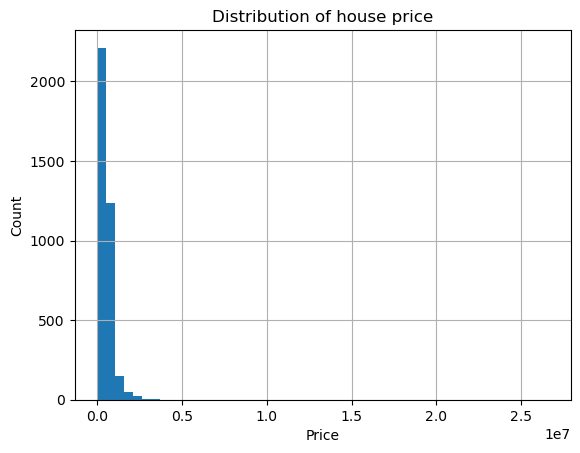

In [29]:
import matplotlib.pyplot as plt
housing["price"].hist(bins = 50)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of house price")
plt.show()

### Log Transformation of Target Variable

The distribution of housing prices exhibits strong right skewness with a long tail of high-priced properties. To reduce skewness, stabilize variance, and improve model learning, we apply a logarithmic transformation to the target variable using `log1p`.


In [32]:
housing["log_price"] = np.log1p(housing["price"])


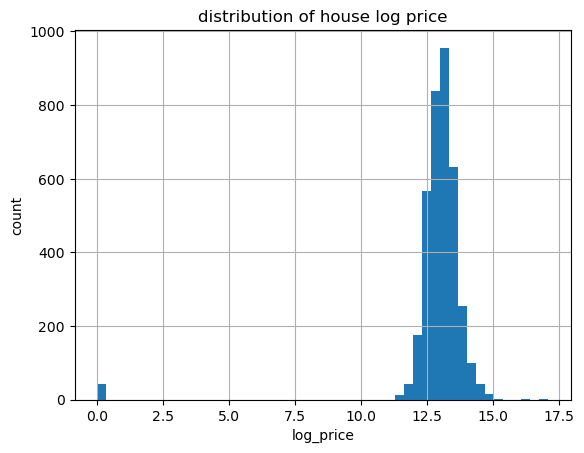

In [33]:
housing["log_price"].hist(bins = 50)
plt.xlabel("log_price")
plt.ylabel("count")
plt.title("distribution of house log price")
plt.show()

In [37]:
corr_matrix = housing.select_dtypes(include=["number"]).corr()


In [39]:
corr_matrix["price"].sort_values(ascending = False)

price            1.000000
sqft_living      0.385066
log_price        0.328503
sqft_above       0.325380
bathrooms        0.299520
view             0.214872
sqft_basement    0.192600
bedrooms         0.177199
floors           0.137626
waterfront       0.114620
sqft_lot         0.046711
condition        0.031347
yr_built         0.026652
yr_renovated    -0.027544
Name: price, dtype: float64

In [40]:
corr_matrix["log_price"].sort_values(ascending = False)


log_price        1.000000
price            0.328503
sqft_living      0.171171
sqft_above       0.149759
bathrooms        0.120657
floors           0.113823
sqft_basement    0.076127
view             0.058629
bedrooms         0.058147
sqft_lot         0.024755
yr_built         0.024360
condition       -0.004860
yr_renovated    -0.020164
waterfront      -0.021054
Name: log_price, dtype: float64

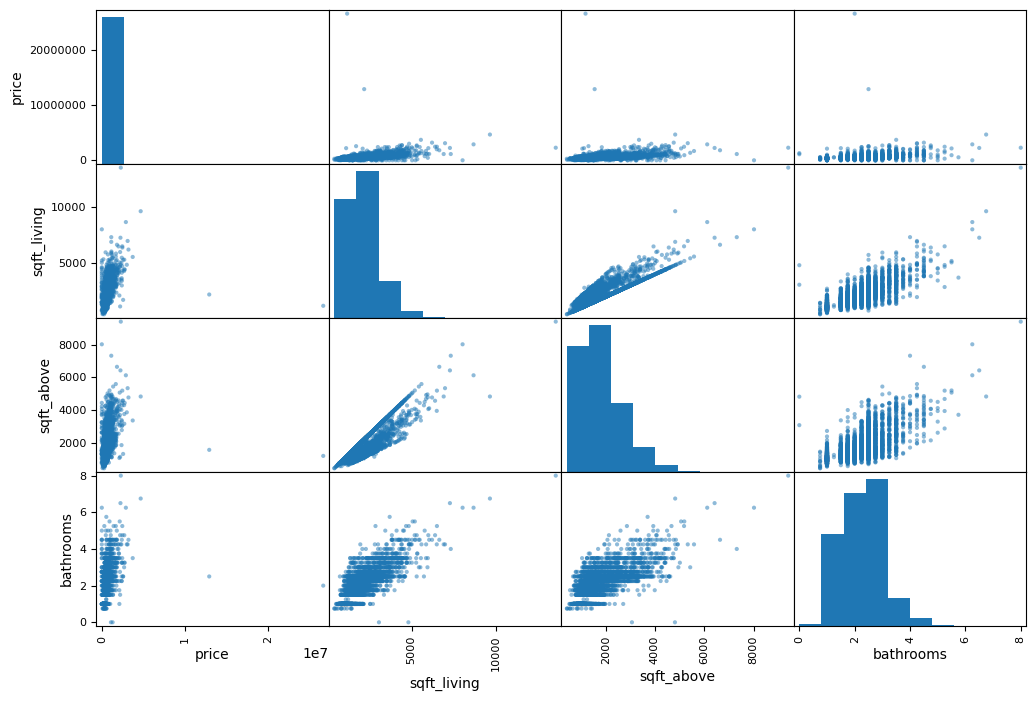

In [42]:
from pandas.plotting import scatter_matrix
attributes = ["price", "sqft_living", "sqft_above","bathrooms"]
scatter_matrix(housing[attributes], figsize = (12,8))
plt.show()

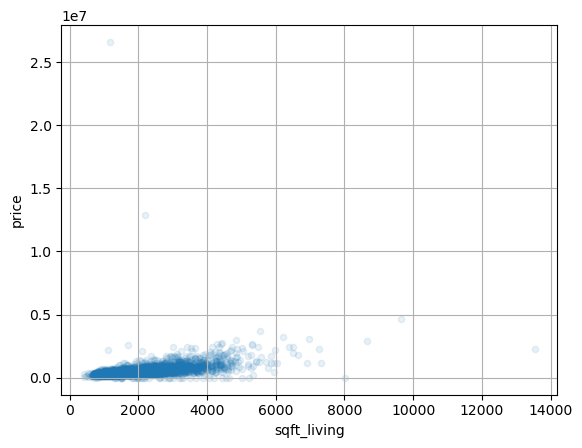

In [43]:
housing.plot(
    kind = "scatter",
    x = "sqft_living",
    y = "price",
    alpha = 0.1,
    grid = True
)
plt.show()


### Feature Engineering: Average Living Area per Bedroom

To capture the interaction between house size and layout, we engineer a feature representing the average living area per bedroom. This feature reflects space efficiency and provides a more informative measure than bedroom count alone.


In [48]:
housing["sqft_per_bedroom"] = (
    housing["sqft_living"] / housing["bedrooms"].replace(0, np.nan)
)

In [49]:
corr_matrix = housing.select_dtypes(include = "number").corr()


In [50]:
corr_matrix["price"].sort_values(ascending = False)


price               1.000000
sqft_living         0.385066
log_price           0.328503
sqft_above          0.325380
sqft_per_bedroom    0.321810
bathrooms           0.299520
view                0.214872
sqft_basement       0.192600
bedrooms            0.177199
floors              0.137626
waterfront          0.114620
sqft_lot            0.046711
condition           0.031347
yr_built            0.026652
yr_renovated       -0.027544
Name: price, dtype: float64